<a href="https://colab.research.google.com/github/mariapaulasedano15/mpss0315/blob/main/02_Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/AlejandroMesa2/Costa-Rican-Household-Poverty-Level-Prediction/main/Datasets/CostaRicanHouseholdPovertyLevel_explored%20(1).csv'
df = pd.read_csv(url)
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBdependency,SQBmeaned,agesq,Target,estadocivil,epared,etecho,energcocinar,eviv,tipovivi
0,ID_279628684,190000.0,no,3,no,si,si,no,0.0,0,...,0.00,100.0000,1849,4.0,divorciado,Regular,Mal,Gas,Mal,rentada
1,ID_f29eb3ddd,135000.0,no,4,no,si,si,si,1.0,0,...,64.00,144.0000,4489,4.0,divorciado,Regular,Regular,Electrico,Regular,rentada
2,ID_68de51c94,0.0,no,8,no,si,si,no,0.0,0,...,64.00,121.0000,8464,4.0,viudo,Regular,Bien,Electrico,Bien,propia
3,ID_d671db89c,180000.0,no,5,no,si,si,si,1.0,0,...,1.00,121.0000,289,4.0,soltero,Bien,Bien,Electrico,Bien,rentada
4,ID_d56d6f5f5,180000.0,no,5,no,si,si,si,1.0,0,...,1.00,121.0000,1369,4.0,union libre,Bien,Bien,Electrico,Bien,rentada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,0.0,si,2,si,si,si,no,0.0,0,...,0.25,33.0625,100,NaN,soltero,Mal,Mal,Electrico,Mal,propia
33409,ID_1a7c6953b,0.0,no,3,no,si,si,no,0.0,0,...,1.00,36.0000,2916,NaN,union libre,Bien,Bien,Gas,Bien,propia
33410,ID_07dbb4be2,0.0,no,3,no,si,si,no,0.0,0,...,1.00,36.0000,144,NaN,soltero,Bien,Bien,Gas,Bien,propia
33411,ID_34d2ed046,0.0,no,3,no,si,si,no,0.0,0,...,1.00,36.0000,144,NaN,soltero,Bien,Bien,Gas,Bien,propia


#Limpieza de columnas redundantes

Las siguientes columnas están repetidas

In [ ]:
repe=[[]]
for j in df.columns:
  repe[df.columns.tolist().index(j)] = [i for i in df.columns if (df[i].equals(df[j]) and i!=j)]
  if len(repe[df.columns.tolist().index(j)])>0:
    print(f'{j} = {[x for x in repe[df.columns.tolist().index(j)]]}')
  repe.append([])


tamhog = ['hhsize', 'hogar_total']
hhsize = ['tamhog', 'hogar_total']
hogar_total = ['tamhog', 'hhsize']
SQBage = ['agesq']
agesq = ['SQBage']


In [ ]:
df.drop(columns=['hhsize','hogar_total','agesq'],inplace=True)

<Axes: xlabel='Target', ylabel='count'>

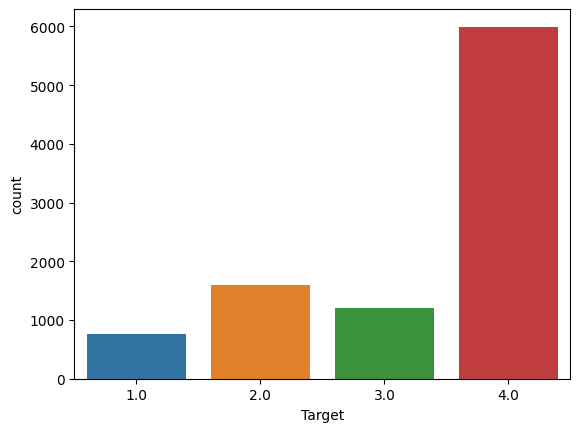

In [ ]:
sns.countplot(x=df['Target'], data = df[df['r4h3']>df['r4m3']])

<Axes: xlabel='Target', ylabel='count'>

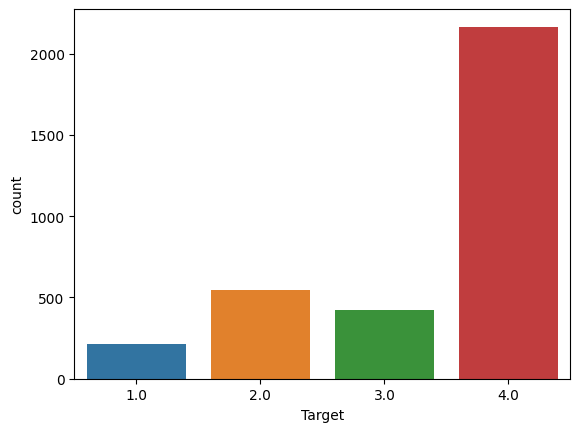

In [ ]:
y=[x for x in np.unique(df['Target']) if math.isnan(x) == False]
data1 = df[df['r4h3']>df['r4m3']]
data1[['r4h3','r4m3']]
sns.countplot(x=data1['Target'], data = data1)

Se observa que no hay una diferencia apreciable en la dependencia del nivel de pobreza con la cantidad de hombres o mujeres, por lo cual se eliminan estas columnas y se deja solo el total de personas

In [ ]:
df.drop(columns=['r4h1','r4h2','r4h3','r4m1','r4m2','r4m3'],inplace=True)

Las variables r4t3 y tamhog hacen referencia a lo mismo, pero no son iguales; sin embargo, tienen una correlación demasiado alta y se intuye que es un error que no sean iguales, por lo cual se elimina una de estas

In [ ]:
df['r4t3'].corr(df['tamhog'])

0.9988557507057798

In [ ]:
df.drop(columns=['tamhog'],inplace=True)

Las columnas v18q y mobilephone no son necesarias, ya que existen otras columnas que dan el mismo dato con mayor detalle

In [ ]:
df.drop(columns=['v18q','mobilephone'],inplace=True)

#Deshacer columnas categóricas

In [ ]:
def categoricas(col):
  for i in range(len(col)):
    col[i] = 1 if col[i]=='si' else 0
  return col

df['hacdor'] = categoricas(df['hacdor'])
df['hacapo'] = categoricas(df['hacapo'])
df['v14a'] = categoricas(df['v14a'])
df['refrig'] = categoricas(df['refrig'])
df['cielorazo'] = categoricas(df['cielorazo'])
df['male'] = categoricas(df['male'])
df['female'] = categoricas(df['female'])

<ipython-input-80-7cb4fd2a23ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i] = 1 if col[i]=='si' else 0


In [ ]:
df.drop(columns=['estadocivil','epared','etecho','energcocinar','eviv','tipovivi'],inplace=True)

Se eliminan columnas cuadráticas

In [ ]:
df.drop(columns=[x for x in df.columns if x.startswith('SQB')], inplace=True)
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4t1,r4t2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0.0,0,1,...,1,0,0,0,0,0,1,0,43,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1.0,0,1,...,1,0,0,0,0,0,1,0,67,4.0
2,ID_68de51c94,0.0,0,8,0,1,1,0.0,0,1,...,1,0,0,0,0,0,1,0,92,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1.0,1,3,...,1,0,0,0,0,0,1,0,17,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1.0,1,3,...,1,0,0,0,0,0,1,0,37,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,ID_a065a7cad,0.0,1,2,1,1,1,0.0,1,5,...,0,0,0,0,0,1,0,1,10,NaN
33409,ID_1a7c6953b,0.0,0,3,0,1,1,0.0,0,4,...,0,0,0,0,0,1,0,1,54,NaN
33410,ID_07dbb4be2,0.0,0,3,0,1,1,0.0,0,4,...,0,0,0,0,0,1,0,1,12,NaN
33411,ID_34d2ed046,0.0,0,3,0,1,1,0.0,0,4,...,0,0,0,0,0,1,0,1,12,NaN


In [ ]:
df.to_csv('CostaRicanHouseholdPovertyLevel_cleaned.csv', index=False)